<font size="3"><b>Netflix</b></font>

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("file.csv")

In [3]:
#Basic information 
df.head()
df.tail()
print(f"Dataframe contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataframe contains 7789 rows and 11 columns


In [4]:
#Total values 
df.size

85679

In [5]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [6]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [7]:
#Data Cleanup
df[df.duplicated()]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [10]:
import seaborn as sns

<Axes: >

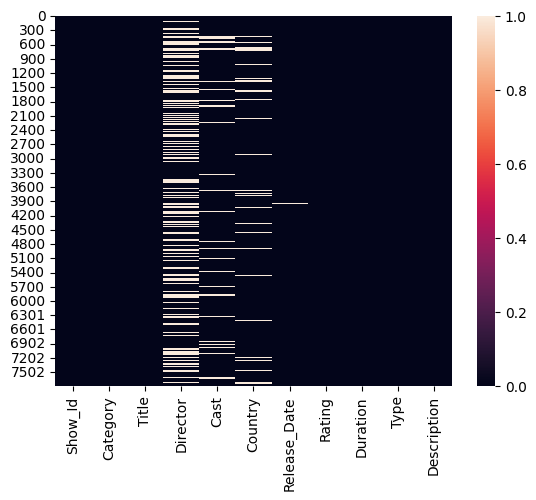

In [11]:
sns.heatmap(df.isnull())

In [12]:
#Show id, director of house of cards
df[df['Title']=="House of Cards"][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


In [13]:
#In which year highest number of the tv shows and movies were released?bar graph

In [14]:
#Format mixed solves every problem with datetime
df['Date']=pd.to_datetime(df['Release_Date'],format='mixed')

In [15]:
df['Date'].dt.year.value_counts()

Date
2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='Date'>

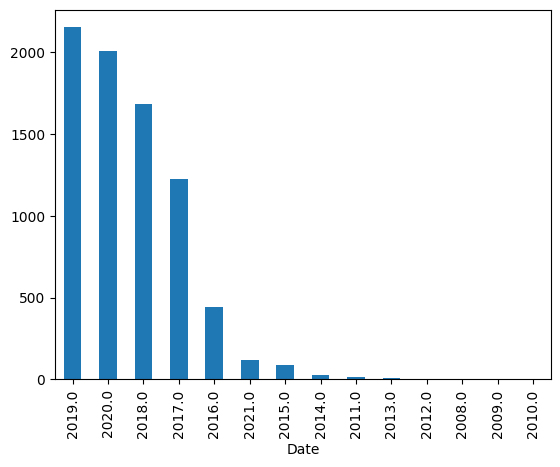

In [16]:
df['Date'].dt.year.value_counts().plot(kind='bar')

<Axes: xlabel='Category'>

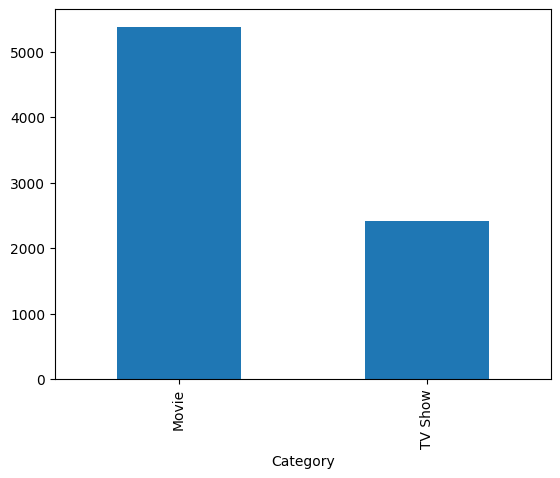

In [17]:
#How many movies and tv shows are in the dataset,bargraph
df['Category'].value_counts().plot(kind='bar')

In [18]:
#Show all movies released in 2020 
df[(df['Category']=="Movie") & (df['Date'].dt.year==2020)]['Title']

4                                            21
6                                           122
14                                         3022
27                                       #Alive
28                #AnneFrank - Parallel Stories
                         ...                   
7762                                  Zaki Chan
7783                                       Zoom
7784                                       Zozo
7786                          Zulu Man in Japan
7788    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: Title, Length: 1312, dtype: object

In [19]:
#Only the titles of all tv shows that were release in India
df[(df["Category"]=="TV Show")&(df['Country'].str.contains('India',case=False))]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
6522                       The Jungle Book
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 75, dtype: object

In [20]:
#If we want released only in India
df[(df["Category"]=="TV Show")&(df['Country']=='India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

In [21]:
#Show top 10 Directors, who gave the highest number of tv shows and movies to netflix 
df['Director'].value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

In [22]:
#all the records where category is movie and type is comedies or country is UK
df[(df["Category"]=="Movie")&(df['Type']=="Comedies") | (df['Country']=='United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31


In [27]:
#In how many movies/shows Tom Cruise was cast
df[df['Cast'].str.contains('Tom Cruise')]
#Since its a famous actor,must be a problem with null values 

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [28]:
#We remove the null values
df1=df.dropna()

In [30]:
df1[df1['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01


In [31]:
#Different Ratings of Netflix 
df['Rating'].nunique()

14

In [32]:
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#How many TV-14 movies are in Canada

In [33]:
df[(df['Country'].str.contains('Canada')) & (df['Rating']=='TV-14') &(df['Category']=='Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27
614,s615,Movie,ATM,Mez Tharatorn,"Chantavit Dhanasevi, Preechaya Pongthananikorn...","United States, Canada","September 5, 2018",TV-14,122 min,"Comedies, International Movies, Romantic Movies","When a broken ATM dishes out a fortune, a coup...",2018-09-05
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01
1996,s1997,Movie,Empire of Scents,Kim Nguyen,NaN,"Canada, France, Italy, Morocco, United States","January 1, 2018",TV-14,87 min,"Documentaries, International Movies",This documentary explores the extent to which ...,2018-01-01
2229,s2230,Movie,For the Love of Spock,Adam Nimoy,"Leonard Nimoy, William Shatner, George Takei, ...","Canada, United States","December 2, 2016",TV-14,112 min,Documentaries,The son of actor Leonard Nimoy directs this mo...,2016-12-02
2834,s2835,Movie,House of Z,Sandy Chronopoulos,Zac Posen,"United States, Canada","January 6, 2018",TV-14,88 min,Documentaries,Featuring archival footage and exclusive inter...,2018-01-06
2902,s2903,Movie,I Am the Pretty Thing That Lives in the House,Osgood Perkins,"Ruth Wilson, Bob Balaban, Lucy Boynton, Paula ...","Canada, United States","October 28, 2016",TV-14,89 min,"Horror Movies, International Movies, Thrillers",A nervous nurse who scares easily finds hersel...,2016-10-28
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12


In [ ]:
#How many TV shows got the R rating after year 2018

In [34]:
len(df[(df['Category']=='TV Show')& (df['Rating']=='R') &(df['Date'].dt.year>2018)])

1

In [ ]:
#To see what was the TV show

In [35]:
df[(df['Category']=='TV Show')& (df['Rating']=='R') &(df['Date'].dt.year>2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25


In [ ]:
#Max duration of series/ movies

In [39]:
df[['Minutes','Unit']]=df['Duration'].str.split(' ',expand=True)

In [47]:
df['Minutes']=df['Minutes'].astype(int)

In [53]:
df['Minutes'].max()

np.int64(312)

In [52]:
df[df['Minutes']==df['Minutes'].max()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Minutes,Unit
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018-12-28,312,min


In [54]:
df[df['Unit']=='Seasons']['Minutes'].max()

np.int64(16)

In [62]:
#To see what was that season 
df[(df['Unit']=='Seasons')&(df['Minutes']<=19)].sort_values('Minutes',ascending=False).head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Minutes,Unit
2538,s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"May 9, 2020",TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020-05-09,16,Seasons


In [ ]:
#Which individual country has the highest no of TV Shows

In [69]:
df[df['Category']=='TV Show']['Country'].value_counts().head(1)

Country
United States    705
Name: count, dtype: int64

In [72]:
#Sort df by year
df['Year']=df['Date'].dt.year

In [ ]:
df.sort_values('Year',ascending=False)

In [ ]:
#Category is movie and type is dramas or  category is tv show and type is Kids' Tv

In [76]:
df[(df['Category']=='Movie')& (df['Type']=='Dramas') | (df['Category']=='TV Show') & (df['Type']=="Kids' TV")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Minutes,Unit,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,123,min,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,119,min,2019.0
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020-10-01,2,Seasons,2020.0
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,110,min,2019.0
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,95,min,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017-06-16,2,Seasons,2017.0
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018-06-23,1,Season,2018.0
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018-06-07,1,Season,2018.0
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019-02-22,2,Seasons,2019.0
